In [40]:
import matplotlib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import matplotlib as mpl
from matplotlib.backends import backend_agg
from matplotlib.colors import LinearSegmentedColormap
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.preprocessing import normalize
import seaborn as sns
# import tf

import tensorflow as tf
from tensorflow.keras.utils import to_categorical
import tensorflow_probability as tfp
from keras import models
from keras import layers
print ('Using TensorFlow version',tf.__version__)

Using TensorFlow version 2.10.0


In [41]:
data = pd.read_csv('iris.csv', header = None)
data2 = sns.load_dataset("iris")

X = data2.iloc[:,0:4].values
y = data2.iloc[:,4].values

from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
y1 = encoder.fit_transform(y)
Y = pd.get_dummies(y1).values

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)

# Getting features
iris_features = data.iloc[:,:4]

# Getting species 
iris_classes = data.iloc[:,4]

# The 6 possible combinations of 2 features
features = [[0,1],[0,2],[0,3],[1,2],[1,3],[2,3]]
feature_titles = ["AB","AC","AD","BC","BD","CD"]

In [42]:
def SVM(selected_features, kernel): # SVM (data not scaled)
    svm = SVC(kernel = kernel)
    svm.fit(selected_features, iris_classes)
    
    return svm.score(selected_features, iris_classes)

In [43]:
# Accuracy results for every 2 feature combination for SVM where kernel is linear
Linear_SVM_Scores = []

for i in range (6):
    selected_features = iris_features[features[i]]
    
    # logistic regression scores 
    Linear_SVM_Scores.append(SVM(selected_features, "linear"))
    

In [44]:
# Results
print("SVM with a Linear Kernal (Nonscaled) results:")
for i in range (6):
    print("Features", feature_titles[i], "results:", Linear_SVM_Scores[i])

SVM with a Linear Kernal (Nonscaled) results:
Features AB results: 0.82
Features AC results: 0.9533333333333334
Features AD results: 0.96
Features BC results: 0.96
Features BD results: 0.96
Features CD results: 0.9666666666666667


In [45]:
# Creating Train, Test, and validation data

# 80% train data     120 samples
# 20% test data      30 samples

model = models.Sequential()
model.add(layers.Dense(300, input_dim = 4, activation='relu'))
model.add(layers.Dense(100, activation='relu'))
model.add(layers.Dense(5, activation='relu'))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(3, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy', 'categorical_crossentropy'])

model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_32 (Dense)            (None, 300)               1500      
                                                                 
 dense_33 (Dense)            (None, 100)               30100     
                                                                 
 dense_34 (Dense)            (None, 5)                 505       
                                                                 
 dropout_8 (Dropout)         (None, 5)                 0         
                                                                 
 dense_35 (Dense)            (None, 3)                 18        
                                                                 
Total params: 32,123
Trainable params: 32,123
Non-trainable params: 0
_________________________________________________________________


In [46]:
model = model.fit(X_train, y_train, validation_data= (X_test, y_test), batch_size = 20, epochs = 30)

Epoch 1/30
6/6 [==============================] - 1s 38ms/step - loss: 1.1321 - accuracy: 0.3917 - categorical_crossentropy: 1.1321 - val_loss: 1.0361 - val_accuracy: 0.5667 - val_categorical_crossentropy: 1.0361
Epoch 2/30
6/6 [==============================] - 0s 5ms/step - loss: 1.0200 - accuracy: 0.5333 - categorical_crossentropy: 1.0200 - val_loss: 0.9858 - val_accuracy: 0.5667 - val_categorical_crossentropy: 0.9858
Epoch 3/30
6/6 [==============================] - 0s 5ms/step - loss: 1.0050 - accuracy: 0.4917 - categorical_crossentropy: 1.0050 - val_loss: 0.9719 - val_accuracy: 0.5667 - val_categorical_crossentropy: 0.9719
Epoch 4/30
6/6 [==============================] - 0s 5ms/step - loss: 0.9447 - accuracy: 0.6167 - categorical_crossentropy: 0.9447 - val_loss: 0.8991 - val_accuracy: 0.5667 - val_categorical_crossentropy: 0.8991
Epoch 5/30
6/6 [==============================] - 0s 5ms/step - loss: 0.9452 - accuracy: 0.5500 - categorical_crossentropy: 0.9452 - val_loss: 0.8482 -

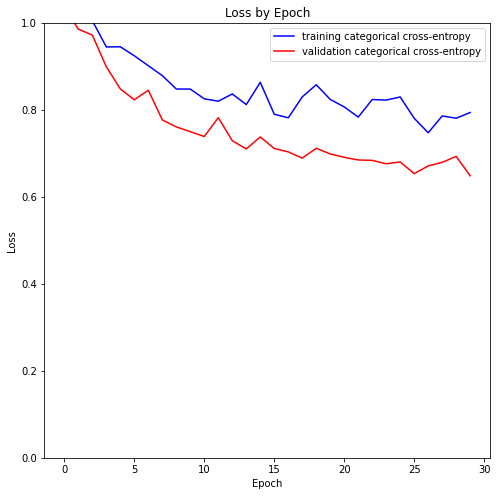

In [47]:
plt.figure(figsize=(8,8))
plt.plot(model.history['loss'], label='training categorical cross-entropy', color='blue')
plt.plot(model.history['val_loss'], label='validation categorical cross-entropy', color='red')
plt.title('Loss by Epoch')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.ylim([0.0, 1.0])
plt.legend(loc='upper right')

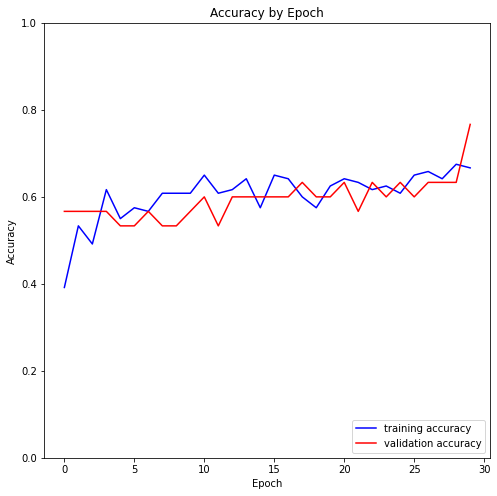

In [48]:
plt.figure(figsize=(8,8))
plt.plot(model.history['accuracy'], label='training accuracy',color='blue')
plt.plot(model.history['val_accuracy'], label = 'validation accuracy',color='red')
plt.title('Accuracy by Epoch')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.0, 1.])
plt.legend(loc='lower right')

Epoch 1/10
6/6 [==============================] - 0s 15ms/step - loss: 0.2211 - accuracy: 0.9000 - categorical_crossentropy: 0.2211 - val_loss: 0.2614 - val_accuracy: 0.8333 - val_categorical_crossentropy: 0.2614

Epoch 2/10
6/6 [==============================] - 0s 8ms/step - loss: 0.4078 - accuracy: 0.8250 - categorical_crossentropy: 0.4078 - val_loss: 0.1489 - val_accuracy: 1.0000 - val_categorical_crossentropy: 0.1489

Epoch 3/10
6/6 [==============================] - 0s 9ms/step - loss: 0.1532 - accuracy: 0.9583 - categorical_crossentropy: 0.1532 - val_loss: 0.0948 - val_accuracy: 0.9667 - val_categorical_crossentropy: 0.0948

Epoch 4/10
6/6 [==============================] - 0s 9ms/step - loss: 0.1682 - accuracy: 0.9083 - categorical_crossentropy: 0.1682 - val_loss: 0.4505 - val_accuracy: 0.8333 - val_categorical_crossentropy: 0.4505

Epoch 5/10
6/6 [==============================] - 0s 9ms/step - loss: 0.3784 - accuracy: 0.8667 - categorical_crossentropy: 0.3784 - val_loss: 0.3490 - val_accuracy: 0.7667 - val_categorical_crossentropy: 0.3490

Epoch 6/10
6/6 [==============================] - 0s 9ms/step - loss: 0.1481 - accuracy: 0.9500 - categorical_crossentropy: 0.1481 - val_loss: 0.0621 - val_accuracy: 0.9667 - val_categorical_crossentropy: 0.0621

Epoch 7/10
6/6 [==============================] - 0s 8ms/step - loss: 0.2101 - accuracy: 0.9333 - categorical_crossentropy: 0.2101 - val_loss: 1.4583 - val_accuracy: 0.5667 - val_categorical_crossentropy: 1.4583

Epoch 8/10
6/6 [==============================] - 0s 8ms/step - loss: 0.3643 - accuracy: 0.9000 - categorical_crossentropy: 0.3643 - val_loss: 0.1367 - val_accuracy: 0.9333 - val_categorical_crossentropy: 0.1367

Epoch 9/10
6/6 [==============================] - 0s 9ms/step - loss: 0.1461 - accuracy: 0.9500 - categorical_crossentropy: 0.1461 - val_loss: 0.1165 - val_accuracy: 0.9333 - val_categorical_crossentropy: 0.1165

Epoch 10/10
6/6 [==============================] - 0s 8ms/step - loss: 0.0894 - accuracy: 0.9750 - categorical_crossentropy: 0.0894 - val_loss: 0.0644 - val_accuracy: 1.0000 - val_categorical_crossentropy: 0.0644